# New Car Job

### Importation des librairies

In [1]:
import sys
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

### Importation des données

In [2]:
df_cars = pd.read_csv('carData.csv')

In [3]:
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_cars.dropna(inplace = True)

### Taille du jeu de données

In [5]:
df_cars.shape

(301, 9)

### Variables du jeux de données

In [6]:
df_cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### Stastiques sur le jeu de données

In [7]:
df_cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Visualisation des stats

<AxesSubplot:ylabel='Frequency'>

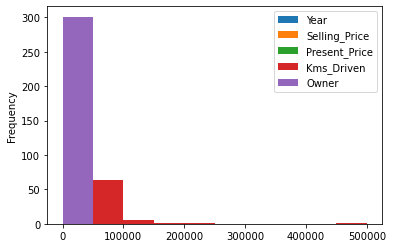

In [8]:
df_cars.plot.hist()

### Visualisation catplot

Cette visualisation est très utile lorsqu'on souhaite observer l'influence de variables catégoriques sur des variables numériques.

<Figure size 72000x72000 with 0 Axes>

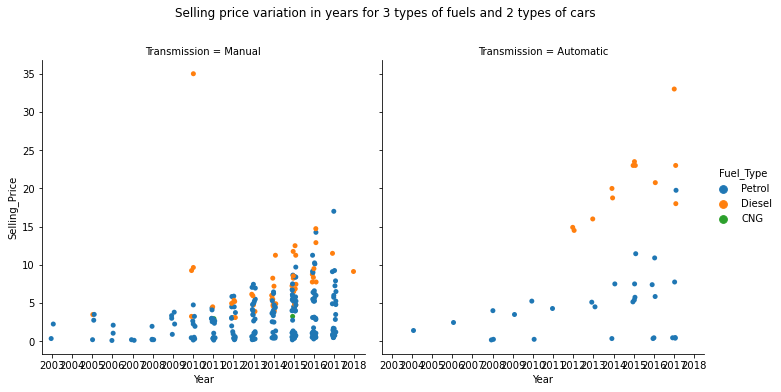

In [9]:
plt.figure(figsize=(1000,1000))
sns.catplot(x="Year", y="Selling_Price", hue='Fuel_Type', col="Transmission", data=df_cars)
plt.rcParams["xtick.labelsize"] = 5
plt.suptitle('Selling price variation in years for 3 types of fuels and 2 types of cars', y=1.08)
plt.show()

### Corrélation entre les variables

In [3]:
# Adding age column to dataset
df_cars['Age'] = 2020 - df_cars['Year']

#### Ordinal Encoding des variables catégoriques

In [4]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df_cars["Fuel_Type"] = ord_enc.fit_transform(df_cars[["Fuel_Type"]])
df_cars["Seller_Type"] = ord_enc.fit_transform(df_cars[["Seller_Type"]])
df_cars["Transmission"] = ord_enc.fit_transform(df_cars[["Transmission"]])

In [12]:
# Dataset correlations
corrMatrix = df_cars.corr(method="pearson")
corrMatrix

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Year,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104,-1.000000
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705,0.053643
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000,0.182104
Age,-1.000000,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104,1.000000


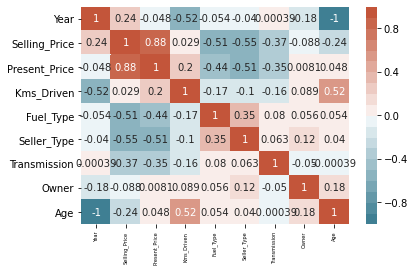

In [13]:
# Correlation matrix heatmap
sns.heatmap(corrMatrix, annot=True, cmap=sns.diverging_palette(220, 20, n=20))
plt.rcParams["xtick.labelsize"] = 10
plt.show()

Le tableau ci-dessus représente la matrice de corrélation entre les différentes variables du dataset. On observe une forte corrélation entre les variables **Selling_Price** et **Present_Price** (88%). On observe également une corrélation négative moyenne de **Selling_Price** avec **Fuel_Type** et **Seller_Type** (respectivement -51% et 55%). De plus, les variables **Age** et **Kms_Driven** sont moyennement corrélées (52%). De même, **Year** est corrélée négativement à **Kms_Driven**. Les autres variables sont assez peu corrélées entre elles.

La régression linaire consiste à construire une fonction prédictive d'une variable à partir de variables explicatives indépendantes entre elles. Une régression linaire peut être appliquée sur nos données à condition de sélectionner les variables indépendantes.

#### Selling_Price by Fuel_Type

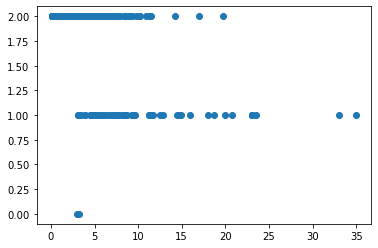

In [14]:
plt.scatter('Selling_Price', 'Fuel_Type', data=df_cars)

#### Kms_Driven by Age

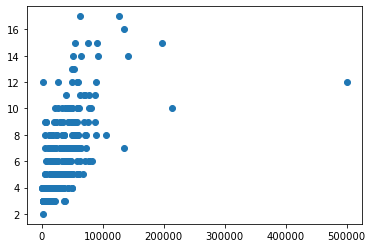

In [15]:
plt.scatter('Kms_Driven', 'Age', data=df_cars)

#### Kms_Driven by Year

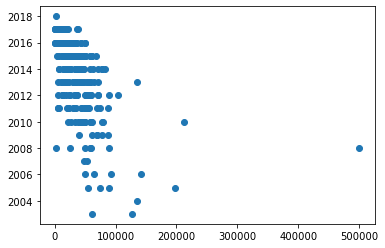

In [16]:
plt.scatter('Kms_Driven', 'Year', data=df_cars)

#### Selling_Price by Year

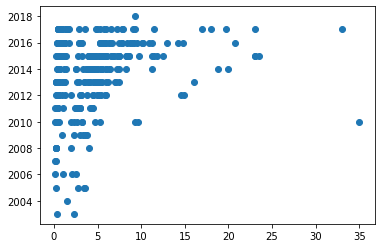

In [17]:
plt.scatter('Selling_Price', 'Year', data=df_cars)

#### Selling_Price by Seller_Type

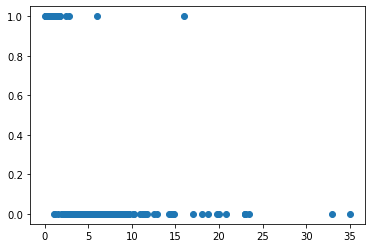

In [18]:
plt.scatter('Selling_Price', 'Seller_Type', data=df_cars)

### Linear Regression with Scipy

In [19]:
X = df_cars['Age']
y = df_cars['Selling_Price']

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print("slope: %f   intercept: %f" % (slope, intercept))

slope: -0.415092   intercept: 7.306299


In [21]:
print("R-squared: %f" % r_value**2)

R-squared: 0.055763


5.57% de la variance de **Selling_Price** peut être expliquée par **Age**.

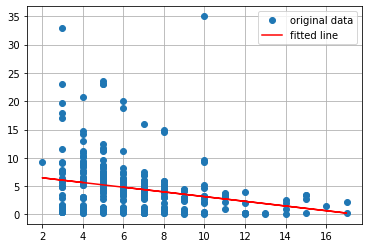

In [22]:
plt.plot(X, y, 'o', label='original data')
plt.plot(X, intercept + slope*X, 'r', label='fitted line')
plt.legend()
plt.grid()
plt.show()

### Linear Regression with Numpy

In [23]:
# Assign input and target variable
X = np.array(df_cars['Age'])
y = np.array(df_cars['Selling_Price'])

In [24]:
model = np.polyfit(X, y, 1)

In [25]:
print("slope: %f  intercept: %f" % (model[0], model[1]))

slope: -0.415092  intercept: 7.306299


In [26]:
predict = np.poly1d(model)

In [27]:
from sklearn.metrics import r2_score
print("R-squared: %f" %r2_score(y, predict(X)))

R-squared: 0.055763


5.57% de la variance de **Selling_Price** peut être expliquée par **Age**.

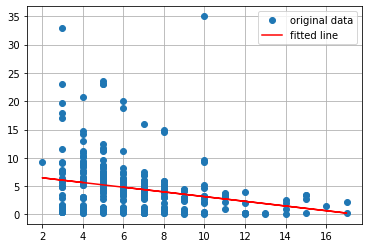

In [28]:
plt.plot(X, y, 'o', label='original data')
plt.plot(X, model[1] + model[0]*X, 'r', label='fitted line')
plt.legend()
plt.grid()
plt.show()

### Linear Regression with SKLearn

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
# Assign input and target
X = np.array(df_cars['Age']).reshape(-1, 1) 
y = np.array(df_cars['Selling_Price']).reshape(-1, 1)

In [31]:
# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [32]:
# Splitting the data into training and testing data 
regr = LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

In [33]:
print("slope: %f   intercept: %f" % (regr.coef_, regr.intercept_))

slope: -0.365102   intercept: 7.088285


In [34]:
print("R-squared: %f" %regr.score(X_test, y_test))

R-squared: 0.062255


8.66% de la variance de **Selling_Price** peut être expliquée par **Age**.

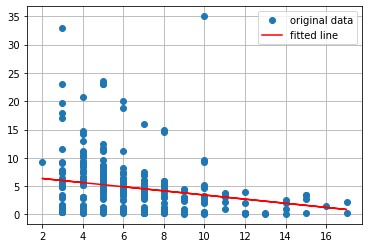

In [35]:
plt.plot(X, y, 'o', label='original data')
plt.plot(X, regr.intercept_ + regr.coef_*X, 'r', label='fitted line')
plt.legend()
plt.grid()
plt.show()

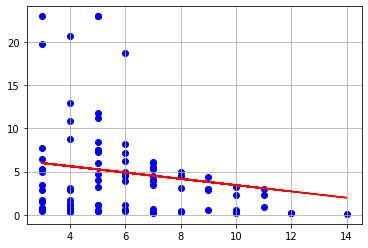

In [36]:
# Données de test prédites par le modèle
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='r')
plt.grid()
plt.show()

#### Evaluation de l'erreur du modèle de Sklearn

In [37]:
results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.621031893731078
Mean Squared Error: 27.090175987585212
Root Mean Squared Error: 5.20482237810141


#### Visualisation des données réelles et des données prédites

C:\Users\straw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


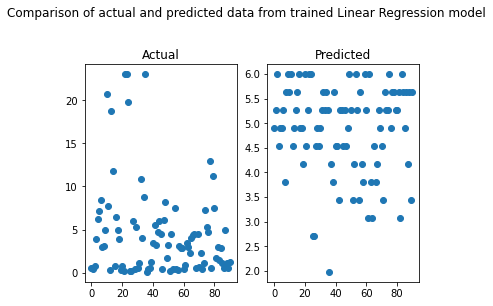

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_test, linestyle='none', marker ='o')
ax1.set_title('Actual')
ax2.plot(y_pred, linestyle='none', marker ='o')
ax2.set_title('Predicted')
fig.suptitle('Comparison of actual and predicted data from trained Linear Regression model', y=1.08)
fig.show()

### Amélioration du modèle

Afin d'améliorer le modèle de prédiction d'autres variables ont été ajoutées au descripteur. Celles-ci sont choisis selon leur score de corrélation avec **Selling_Price**. Les variables **Fuel_Type**, **Seller_Type** et **Transmission** ont donc été sélectionnées pour l'amélioration du modèle.

In [39]:
X = pd.DataFrame(df_cars, columns=['Age', 'Fuel_Type', 'Seller_Type', 'Transmission'])

In [40]:
X = np.array(X)
y = np.array(df_cars['Selling_Price'])

In [67]:
y.shape

(301,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [43]:
regr2 = LinearRegression() 
regr2.fit(X_train, y_train)

LinearRegression()

In [44]:
print("R-squared: %f" %regr2.score(X_test, y_test))

R-squared: 0.607997


### Class LinearRegression

In [45]:
from mpl_toolkits.mplot3d import Axes3D

from LR import LinearRegressionBis

df_cars = pd.read_csv('carData.csv')

df_cars['Age'] = 2020 - df_cars['Year']

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df_cars["Fuel_Type"] = ord_enc.fit_transform(df_cars[["Fuel_Type"]])
df_cars["Seller_Type"] = ord_enc.fit_transform(df_cars[["Seller_Type"]])
df_cars["Transmission"] = ord_enc.fit_transform(df_cars[["Transmission"]])

df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,2.0,0.0,1.0,0,6
1,sx4,2013,4.75,9.54,43000,1.0,0.0,1.0,0,7
2,ciaz,2017,7.25,9.85,6900,2.0,0.0,1.0,0,3
3,wagon r,2011,2.85,4.15,5200,2.0,0.0,1.0,0,9
4,swift,2014,4.60,6.87,42450,1.0,0.0,1.0,0,6


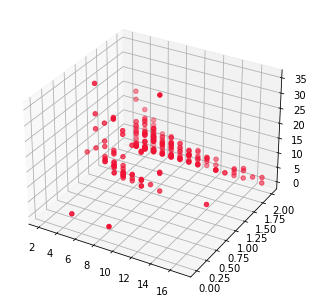

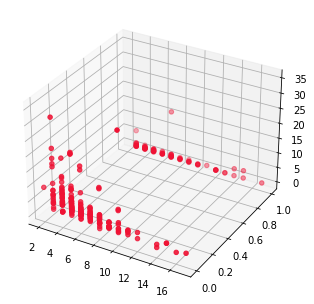

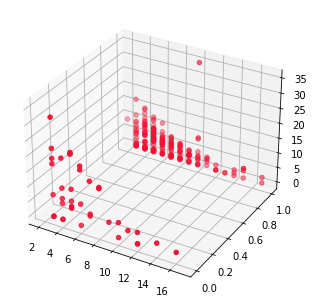

Initial Cost
23.738410132890365
New Coefficients
[-0.33625614 -3.59094957 -4.41164859 -4.46011092 18.61523675]
Final Cost
5.740568272470973
RMSE
3.3883825853852376
R2 Score
0.5541157771148371


In [46]:
if __name__ == '__main__':
     # prepare data
    age = df_cars['Age'].values
    fuel_type = df_cars['Fuel_Type'].values
    seller_type = df_cars['Seller_Type'].values
    transmission = df_cars['Transmission'].values
    price = df_cars['Selling_Price'].values
    
    fig1 = plt.figure(0)
    ax = Axes3D(fig1)
    ax.scatter(age, fuel_type, price, color='#ef1234')
    plt.show()
    
    fig2 = plt.figure(1)
    ax = Axes3D(fig2)
    ax.scatter(age, seller_type, price, color='#ef1234')
    plt.show()
    
    fig3 = plt.figure(2)
    ax = Axes3D(fig3)
    ax.scatter(age, transmission, price, color='#ef1234')
    plt.show()
    
    m = len(age)
    x0 = np.ones(m)
    X = np.array([age, fuel_type, seller_type, transmission, x0]).T
    y = np.array(price)
    
    LR = LinearRegressionBis(X, y)
    n_B = LR.fit()
    y_pred = LR.predict(n_B)
    
    print("RMSE")
    print(LR.rmse(y, y_pred))
    print("R2 Score")
    print(LR.r2_score(y, y_pred))

### Moins de 7 ans, moins de 100 000 km et boite manuelle

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
X = pd.DataFrame(df_cars, columns=['Age', 'Kms_Driven', 'Transmission'])
X = np.array(X)
print(type(X), X.shape)
y = np.array(df_cars['Selling_Price'])

<class 'numpy.ndarray'> (301, 3)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30)

In [8]:
regr3 = LinearRegression() 
regr3.fit(X_train, y_train)

LinearRegression()

In [10]:
print("R-squared: %f" %regr3.score(X_val, y_val))

R-squared: 0.268584


In [21]:
X_test = np.array([2, 97355, 1]).reshape(1, -1)
regr3.predict(X_test)

array([6.6101382])